# Outliers detection
## Instructions

<img src="./img/anomaly_detection_exercise_page2.png" alt="dataset" width="600"/>

<img src="./img/anomaly_detection_exercise_page3.png" alt="problem" width="600"/>

# Formulation of the problem
Since we don't have any informations on the physical aspects of the data, units, frequency of measurements, ... We will study the dataset from a statistical point of view, i.e. In which proportion one window is different from the other ones. 

We will first check the uniformity of the dataset, the repartition of data points per features, and per windows for example.

We will then use some ML algorithms for anomaly detections and provide some functions to display the result.

## Required imports

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# Defining default matplotlib colors as a list of hex colors
mplt_colors = np.array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf'])

# Dataset exploration

In [3]:
# Read dataset from csv file add store it into a pandas DataFrame 
df = pd.read_csv('data/dataset.csv')
# Quick look at the data set structure and some statistics
display(df.iloc[98:102], df.describe())

day_cycle_window        p1        p2        p3        p4        p5  \
98             1_1_1 -1.803653 -2.471177 -2.634293 -2.876569 -2.890035   
99             1_1_1 -1.804485 -2.471116 -2.634234 -2.875820 -2.888859   
100            1_1_2 -1.811775 -2.471116 -2.634234 -2.875820 -2.888859   
101            1_1_2 -1.821870 -2.471116 -2.616262 -2.875820 -2.888859   

           p6        p7        p8        p9       p10       p11  
98  -1.249249 -2.474981 -0.640280  2.690807 -1.938069 -3.132566  
99  -1.249249 -2.474815 -0.640413  2.690991 -1.938111 -3.132542  
100 -1.249249 -2.474815 -0.640413  2.690991 -1.938111 -3.132542  
101 -1.249249 -2.474815 -0.640413  2.690991 -1.938111 -3.132542

p1             p2             p3             p4  \
count  162702.000000  162702.000000  162702.000000  162702.000000   
mean        0.000009       0.000011       0.000031       0.000005   
std         0.999950       0.999925       0.999961       0.999925   
min        -3.211980      -3.395387      -3.325651      -3.378450   
25%        -0.678808      -0.482716      -0.629123      -0.491585   
50%         0.041883       0.180360       0.041442       0.147397   
75%         0.743973       0.656920       0.659246       0.636887   
max         5.013899       6.260782       8.652950       8.359670   

                  p5             p6             p7             p8  \
count  162702.000000  162702.000000  162702.000000  162702.000000   
mean        0.000016      -0.000005      -0.000002       0.000003   
std         0.999963       0.999926       0.999950       0.999949   
min        -3.281286      -4.200181      -3.898025      -3.524957   
25%        -0.612334      -0.559023      -0.606135      -0.736398   
50%         0.117040       0.153972       0.186038      -0.012354   
75%         0.712393       0.685353       0.718237       0.802395   
max         6.424227       5.638259       3.735957       4.667058   

                  p9            p10            p11  
count  162702.000000  162702.000000  162702.000000  
mean       -0.000021       0.000026       0.000030  
std         0.997770       0.999686       0.999847  
min       -13.704556     -12.044778      -3.183571  
25%        -0.593096      -0.498480      -0.658530  
50%        -0.034882      -0.257635      -0.015437  
75%         0.508232       0.359773       0.636740  
max         8.203706       5.597387       9.204384

In [4]:
# Define some useful labels
day_cycle_window = 'day_cycle_window'
dcw = ['day', 'cycle', 'window']
feature_labels = df.columns.values[-11:]
print(f"{feature_labels=}")

feature_labels=array(['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11'],
      dtype=object)


Text(0.5, 1.0, 'Boxplot of all the features')

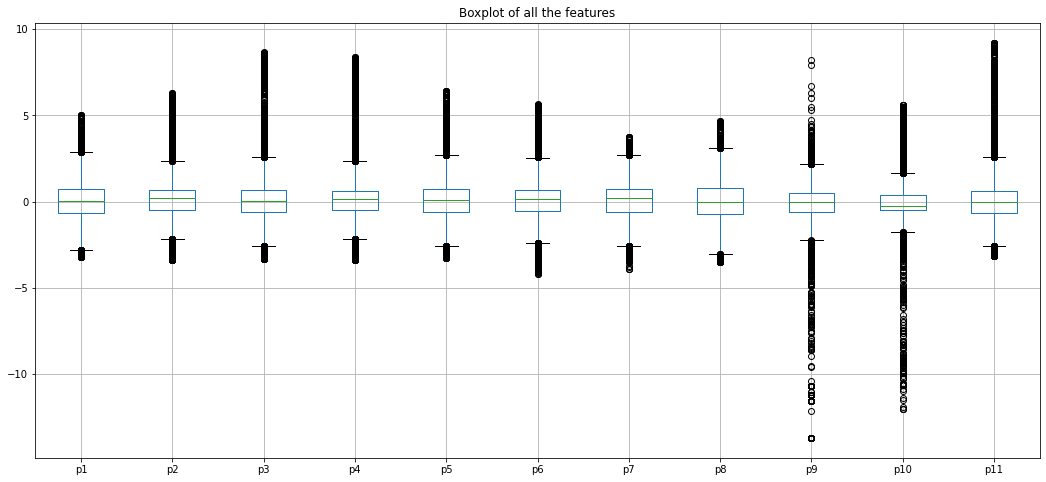

In [5]:
# Box plot of the features to better visualize the statistics given by .describe()
ax = df[feature_labels].boxplot(figsize=(18,8), return_type='axes')
ax.set_title("Boxplot of all the features")

In [6]:
# Check for NaN values
df.isna().sum()

day_cycle_window    0
p1                  0
p2                  0
p3                  0
p4                  0
p5                  0
p6                  0
p7                  0
p8                  0
p9                  0
p10                 0
p11                 0
dtype: int64

First observation, all the features are almost reduced and centered ($\mu\approx0$ and $\sigma\approx1$). Second, there is the same amount of data for each features. Third there is no clear missing values, i.e. `NaN` values in the data.

## Add `day`, `cycle` and `window` columns to the DataFrame by parsing `day_cycle_window` column


In [7]:
%%time # need approximately 45 seconds to run
def split_dcw(s):
    dcw = s.split('_')
    return pd.Series({'day':int(dcw[0]), 'cycle':int(dcw[1]), 'window':int(dcw[2])})

# Add 'day', 'cycle' and 'window' columns to df by parsing 'day_cycle_window' column
df = df.merge(df.day_cycle_window.apply(split_dcw), left_index=True, right_index=True)
# Re-order columns 
cols = df.columns.tolist()
cols = [cols[0]] + cols[-3:] + cols[1:-3]
df = df[cols] 
# Sort rows by 'day', 'cycle', 'window' in this order.
df = df.sort_values(['day', 'cycle', 'window']).reset_index(drop=True)
# Visualize the result
df.head(2)

CPU times: user 43.9 s, sys: 787 ms, total: 44.7 s
Wall time: 44.6 s


day_cycle_window  day  cycle  window        p1        p2        p3  \
0            1_1_1    1      1       1 -0.805191 -1.141993 -1.328327   
1            1_1_1    1      1       1 -0.805191 -1.134902 -1.320393   

         p4        p5       p6        p7        p8        p9       p10  \
0 -1.516693 -1.373962 -0.80827 -1.070547 -0.504352  2.807146  0.495528   
1 -1.505848 -1.361560 -0.80784 -1.064212 -0.516000  2.894177  0.494467   

        p11  
0 -1.246737  
1 -1.244472

## Distribution of the data per features, days, cycles, and windows

In [9]:
display("Numbers of windows per cycle and per day",
df.groupby(day_cycle_window).mean().groupby(['day', 'cycle']).agg(nb_windows=pd.NamedAgg(column="p1", aggfunc="count")).transpose(), 
df.groupby(day_cycle_window).mean().groupby(['day']).agg(nb_windows=pd.NamedAgg(column="p1", aggfunc="count")).transpose())

'Numbers of windows per cycle and per day'

day          1                    2             3            4              
cycle        1    2  3   4   5    1   2    3    1   2    3   1    2   3    4
nb_windows  68  181  6  17  94  181  76  145  181  52  181  49  181  65  160

day           1    2    3    4
nb_windows  366  402  414  455

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd4efc9ca0>,
      dtype=object)

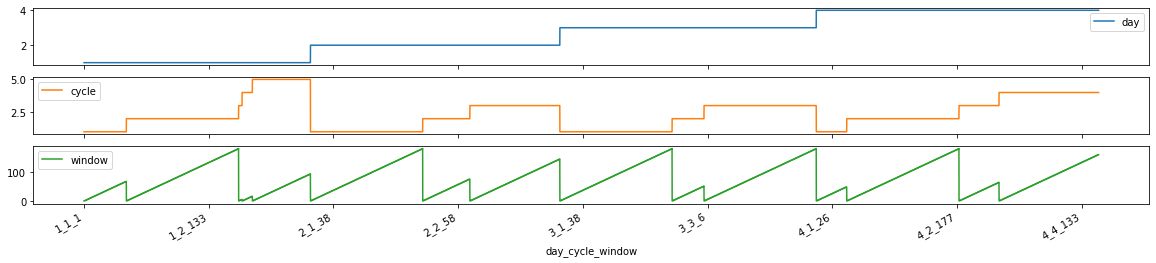

In [10]:
df.set_index(['day_cycle_window'])[dcw].plot(figsize=(20, 4), subplots=True)

We observe that Cycle 3 and 4 of Day 1 (`1_3` and `1_4`) have small amounts of data compared to the other cycles.

In [11]:
windows_count = df.groupby(['day', 'cycle', 'window', 'day_cycle_window'])[feature_labels].count()
windows_count.head(2)

p1   p2   p3   p4   p5   p6   p7   p8  \
day cycle window day_cycle_window                                           
1   1     1      1_1_1             100  100  100  100  100  100  100  100   
          2      1_1_2             100  100  100  100  100  100  100  100   

                                    p9  p10  p11  
day cycle window day_cycle_window                 
1   1     1      1_1_1             100  100  100  
          2      1_1_2             100  100  100

In [12]:
no_diff = True
for i in range(len(feature_labels)-1):
    if np.setdiff1d(windows_count[feature_labels[i]], windows_count[feature_labels[i+1]]).shape[0] > 0:
        print(f"Difference between feature {feature_labels[i]} and {feature_labels[i+1]}")
        no_diff = False
if no_diff:
    print("No differences between the features", feature_labels) # no difference two by two so no difference

No differences between the features ['p1' 'p2' 'p3' 'p4' 'p5' 'p6' 'p7' 'p8' 'p9' 'p10' 'p11']


We found that the number of data points for each window is the same for all the features $[p1, p2, ..., p9]$

It seems that, in general, there is $100$ data per window, __but__ it seems that there is some windows with less than $100$ data. Let's explore those windows.

In [13]:
# Count windows with not 100 values
unique_values, counts = np.unique(windows_count.p1, return_counts=True)
for v, c in zip(unique_values, counts):
    print(f"{c} windows with {v} data points")

2 windows with 2 data points
3 windows with 3 data points
2 windows with 17 data points
1 windows with 22 data points
1 windows with 32 data points
1 windows with 50 data points
1 windows with 53 data points
1 windows with 62 data points
1 windows with 75 data points
1 windows with 76 data points
1 windows with 85 data points
1622 windows with 100 data points


In [14]:
# Look at windows with not 100 values
print(f"\nThere is {windows_count.p1.shape[0]-counts[-1]} windows with less than 100 data points, they are displayed below")
less_than_100_idxs = np.where(windows_count.p1 < 100)[0]
windows_count.iloc[less_than_100_idxs]


There is 15 windows with less than 100 data points, they are displayed below


p1  p2  p3  p4  p5  p6  p7  p8  p9  p10  \
day cycle window day_cycle_window                                            
1   1     68     1_1_68            75  75  75  75  75  75  75  75  75   75   
    2     181    1_2_181            3   3   3   3   3   3   3   3   3    3   
    3     6      1_3_6             53  53  53  53  53  53  53  53  53   53   
    4     17     1_4_17            50  50  50  50  50  50  50  50  50   50   
    5     94     1_5_94            17  17  17  17  17  17  17  17  17   17   
2   1     181    2_1_181            2   2   2   2   2   2   2   2   2    2   
    2     76     2_2_76            62  62  62  62  62  62  62  62  62   62   
    3     145    2_3_145           32  32  32  32  32  32  32  32  32   32   
3   1     181    3_1_181            3   3   3   3   3   3   3   3   3    3   
    2     52     3_2_52            17  17  17  17  17  17  17  17  17   17   
    3     181    3_3_181            2   2   2   2   2   2   2   2   2    2   
4   1     49     4_1_49            85  85  85  85  85  85  85  85  85   85   
    2     181    4_2_181            3   3   3   3   3   3   3   3   3    3   
    3     65     4_3_65            22  22  22  22  22  22  22  22  22   22   
    4     160    4_4_160           76  76  76  76  76  76  76  76  76   76   

                                   p11  
day cycle window day_cycle_window       
1   1     68     1_1_68             75  
    2     181    1_2_181             3  
    3     6      1_3_6              53  
    4     17     1_4_17             50  
    5     94     1_5_94             17  
2   1     181    2_1_181             2  
    2     76     2_2_76             62  
    3     145    2_3_145            32  
3   1     181    3_1_181             3  
    2     52     3_2_52             17  
    3     181    3_3_181             2  
4   1     49     4_1_49             85  
    2     181    4_2_181             3  
    3     65     4_3_65             22  
    4     160    4_4_160            76

In [15]:
less_than_100_wlabels = windows_count.iloc[less_than_100_idxs].index.get_level_values('day_cycle_window')
less_than_100_wlabels

Index(['1_1_68', '1_2_181', '1_3_6', '1_4_17', '1_5_94', '2_1_181', '2_2_76',
       '2_3_145', '3_1_181', '3_2_52', '3_3_181', '4_1_49', '4_2_181',
       '4_3_65', '4_4_160'],
      dtype='object', name='day_cycle_window')

Those windows are actually the windows ending the cycle. They can be seen as abnormal because they will not contain as much informations as regular windows with 100 data points.
### Visualize windows with less than 100 data points

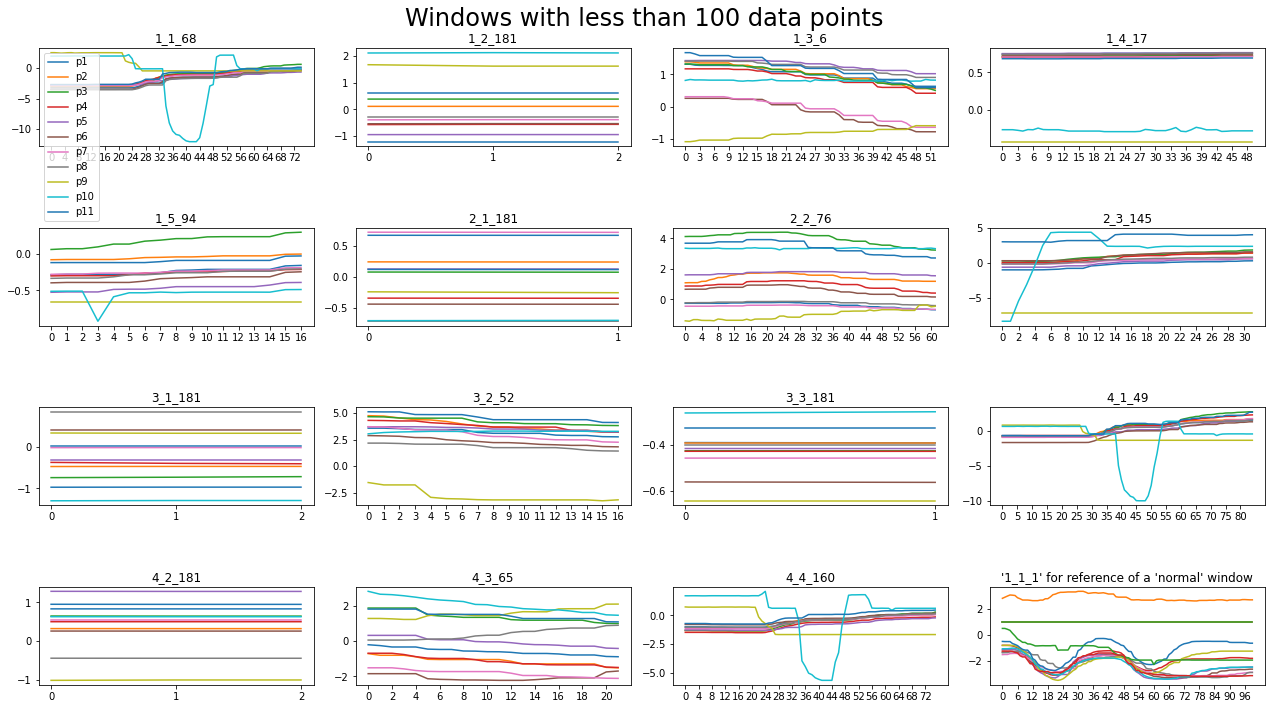

In [16]:
n = less_than_100_wlabels.shape[0]
nrows = n//4 + 1*(n%4 > 0)
fig, axs = plt.subplots(nrows, 4, figsize=(18,10))
fig.suptitle("Windows with less than 100 data points", fontsize=24)
for i, (label, grouped) in enumerate(df.set_index('day_cycle_window').loc[less_than_100_wlabels][feature_labels].groupby('day_cycle_window')):
    ax = axs[i//4, i%4]
    ax.set_title(label)
    grouped.plot(ax=ax, legend=i==0, use_index=False, xticks=range(0,grouped.p1.shape[0], 1+grouped.p1.shape[0]//20))
# Plot window '1_1_1' for reference of a 'normal' window (100 data points)
w_1_1_1 = df.set_index('day_cycle_window').loc['1_1_1']
w_1_1_1.plot(ax=axs[nrows-1,3], legend=False, use_index=False, xticks=range(0,w_1_1_1.p1.shape[0], 1+w_1_1_1.p1.shape[0]//20))
axs[nrows-1,3].set_title("'1_1_1' for reference of a 'normal' window")
fig.tight_layout(rect=[0, 0, 1, 0.96])

We can see that those ending cycle windows can't be considered like the other one, especially the one with very few data points like `1_2_181`, `1_5_94`, `2_1_181`, `3_1_181`, `4_2_181`

# Visualize data

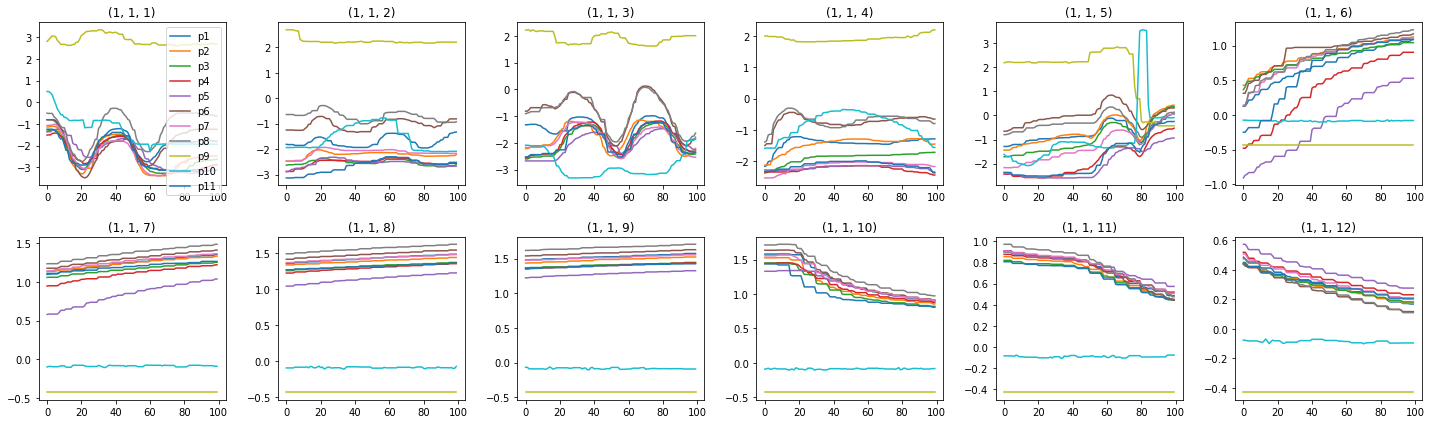

In [17]:
# lets look at the 12 first windows
n = 12
ncols = 6
nrows = n//ncols + 1*(n%ncols > 0)
fig, axs = plt.subplots(nrows, ncols, figsize=(20,6))
for i, (label, grouped) in enumerate(df.set_index('day_cycle_window').loc[df.day_cycle_window.unique()[:n]].groupby(dcw)):
    ax = axs[i//ncols, i%ncols]
    ax.set_title(label)
    grouped[feature_labels].plot(ax=ax, legend=i==0, use_index=False)

fig.tight_layout()

In [18]:
def plot_cycle(day, cycle, df=df, figsize=(16,6)):
    df.loc[df['day'] == day].loc[df['cycle'] == cycle].set_index(day_cycle_window)[feature_labels].plot(
        figsize=figsize,
        title=f"{day}_{cycle}",
    )

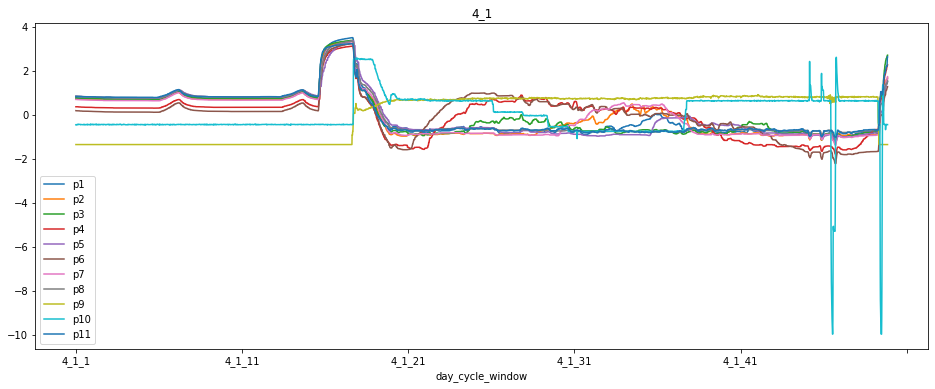

In [20]:
plot_cycle(4,1)

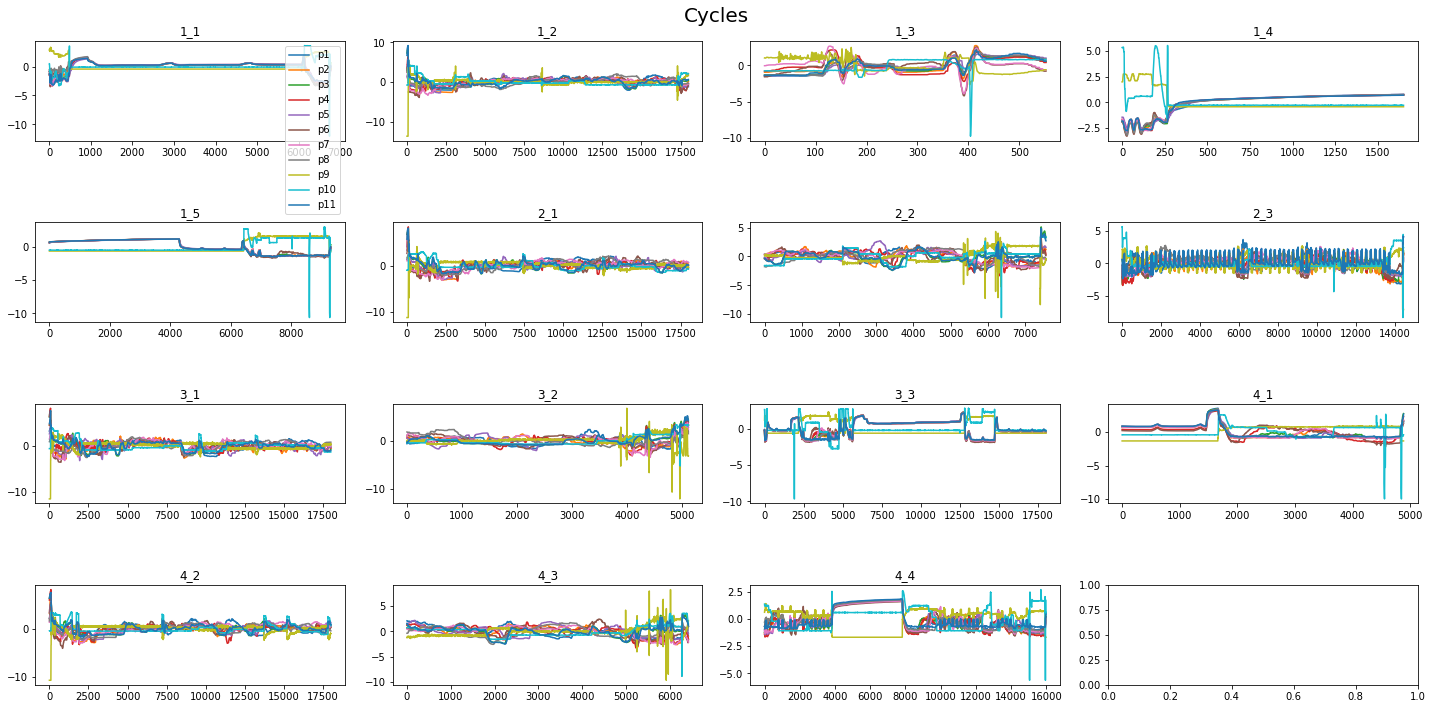

In [21]:
# looks like we better plot the data by cycle
dc_df = df.groupby(['day', 'cycle'])
n = len(dc_df.groups)
nrows = n//4 + 1*(n%4 > 0)
fig, axs = plt.subplots(nrows, 4, figsize=(20,10))
fig.suptitle("Cycles", fontsize=20)
for i, (label, grouped) in enumerate(dc_df):
    grouped = grouped[feature_labels]
    ax = axs[i//4, i%4]
    ax.set_title(f"{label[0]}_{label[1]}")
    grouped.plot(ax=ax, legend=i==0, use_index=False)

fig.tight_layout(rect=[0, 0, 1, 0.97])

# Grouping the data per window using the mean
Now that we have dealt the raw data and see the window that are not uniform with the dataset in term of number of data points.

One idea is to consider the feature by averaging on the windows, to easily compare the windows based on those means.

In [22]:
mdf = df.groupby(['day_cycle_window']).mean().sort_values(dcw).reset_index()
mdf.head(2)

day_cycle_window  day  cycle  window        p1        p2        p3  \
0            1_1_1    1      1       1 -1.926141 -2.456284 -2.487394   
1            1_1_2    1      1       2 -1.714067 -2.217161 -2.530537   

         p4        p5        p6        p7        p8        p9       p10  \
0 -2.481230 -2.388674 -1.984092 -2.447148 -1.169837  2.848242 -1.370045   
1 -2.515985 -2.544961 -1.040076 -2.127244 -0.700150  2.246956 -1.545889   

        p11  
0 -2.500060  
1 -2.654753

In [23]:
mdf[feature_labels].describe()

p1           p2           p3           p4           p5  \
count  1637.000000  1637.000000  1637.000000  1637.000000  1637.000000   
mean      0.001238     0.002203     0.004516     0.001227     0.002002   
std       0.984739     0.972068     0.977228     0.965178     0.981063   
min      -3.161210    -3.131407    -2.786465    -3.016270    -2.938245   
25%      -0.656294    -0.464786    -0.627214    -0.484833    -0.609168   
50%       0.036949     0.178310     0.046624     0.163838     0.112851   
75%       0.732917     0.636372     0.628836     0.620310     0.701837   
max       3.507462     5.173017     7.463722     7.218977     5.202062   

                p6           p7           p8           p9          p10  \
count  1637.000000  1637.000000  1637.000000  1637.000000  1637.000000   
mean     -0.000175     0.000626     0.000700    -0.004657     0.004040   
std       0.973094     0.982552     0.986130     0.939800     0.938960   
min      -3.723546    -3.156266    -3.490736   -10.536143    -2.853705   
25%      -0.565333    -0.589464    -0.719675    -0.575196    -0.488833   
50%       0.155493     0.199685    -0.016729    -0.031227    -0.253862   
75%       0.665579     0.708269     0.800933     0.477545     0.356017   
max       4.685652     3.100243     3.608533     2.848242     4.121677   

               p11  
count  1637.000000  
mean      0.005881  
std       0.966371  
min      -2.654753  
25%      -0.641498  
50%       0.021857  
75%       0.624762  
max       7.721477

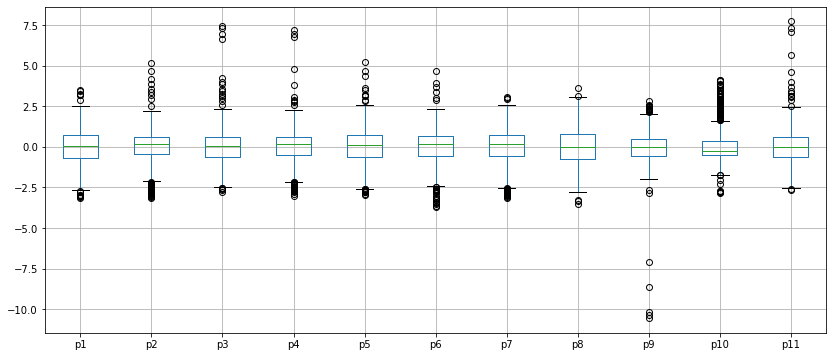

In [24]:
mdf[feature_labels].boxplot(figsize=(14,6))

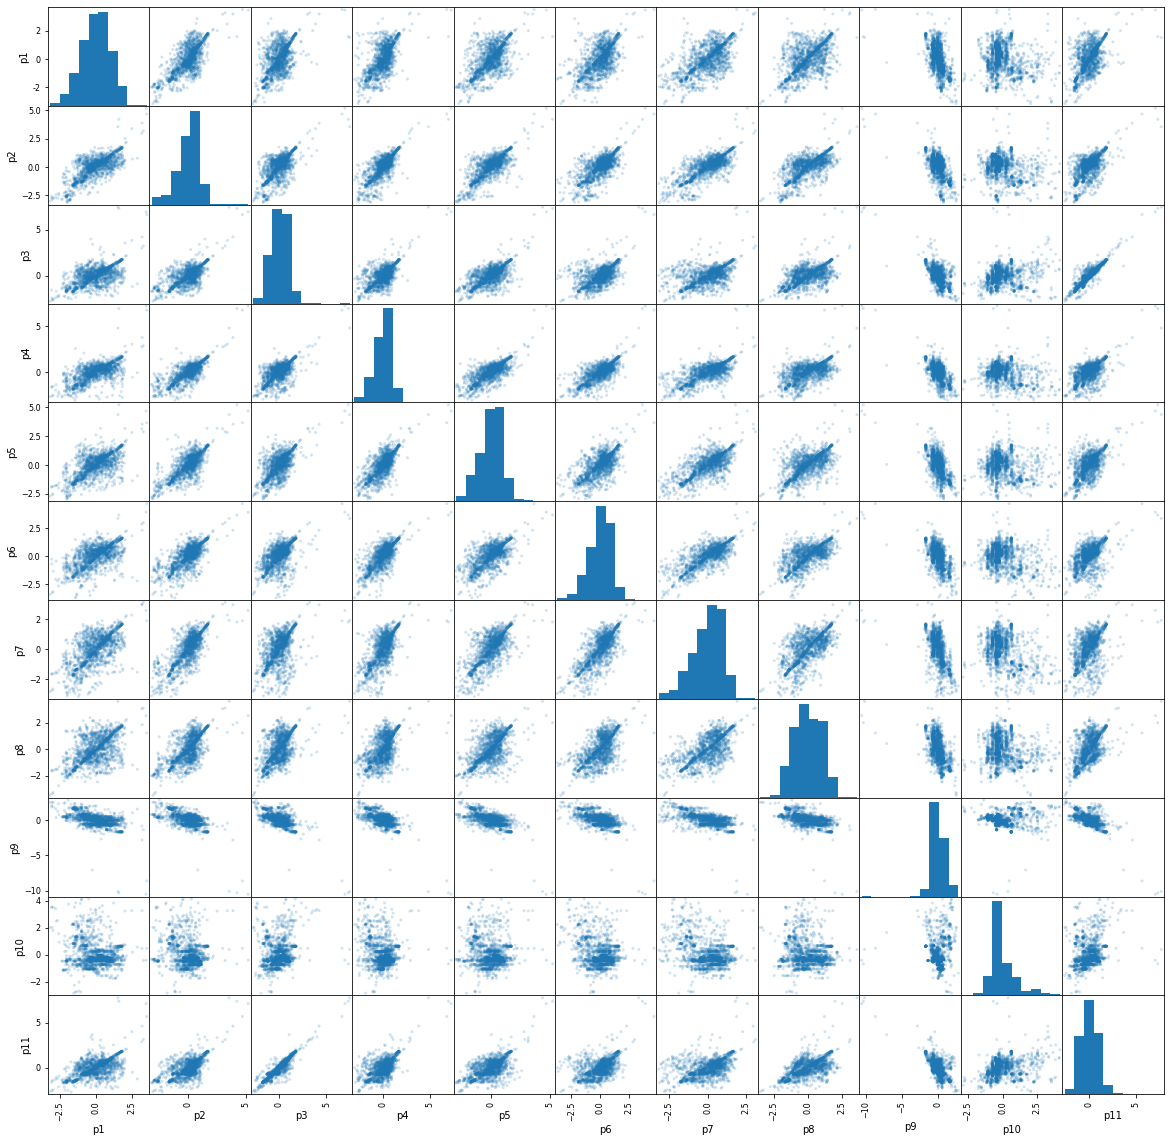

In [25]:
scatter_matrix(mdf[feature_labels], alpha=0.2, figsize=(20, 20), diagonal='hist');

We can observe that the features `[p1,p2,p3,p4,p5,p6,p7,p8]` seem to be correlated, while the features `p9, p10, p11` seem to be of another type. 

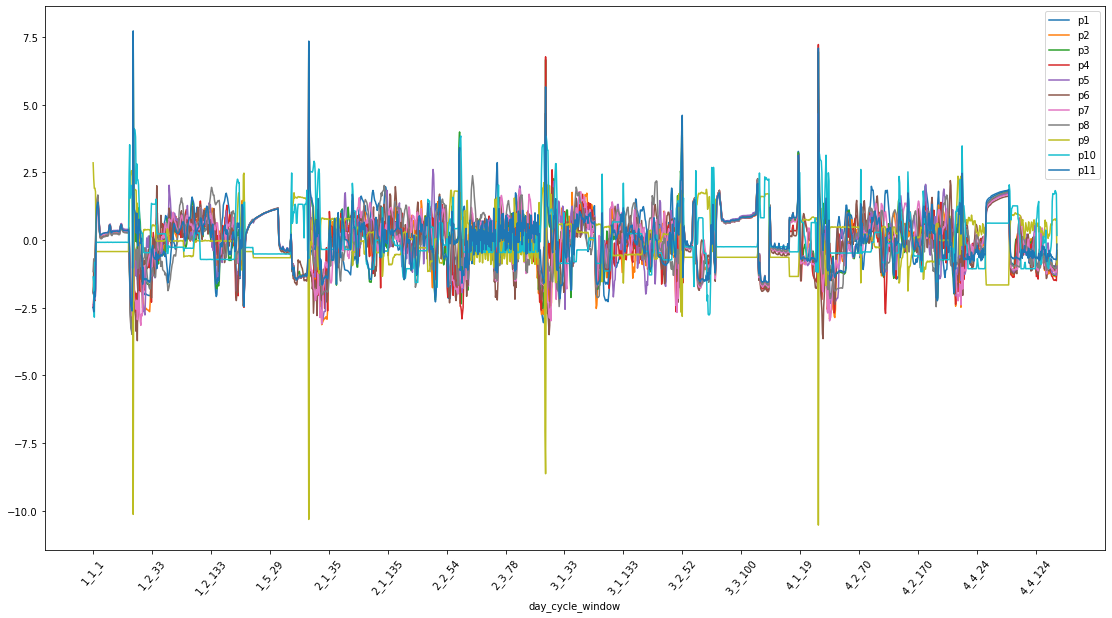

In [26]:
ax = mdf.set_index(day_cycle_window)[feature_labels].plot(
    figsize=(19, 10),
    rot=50,
    xticks=np.arange(0, mdf.shape[0], 100)
)

# Anomalies per features

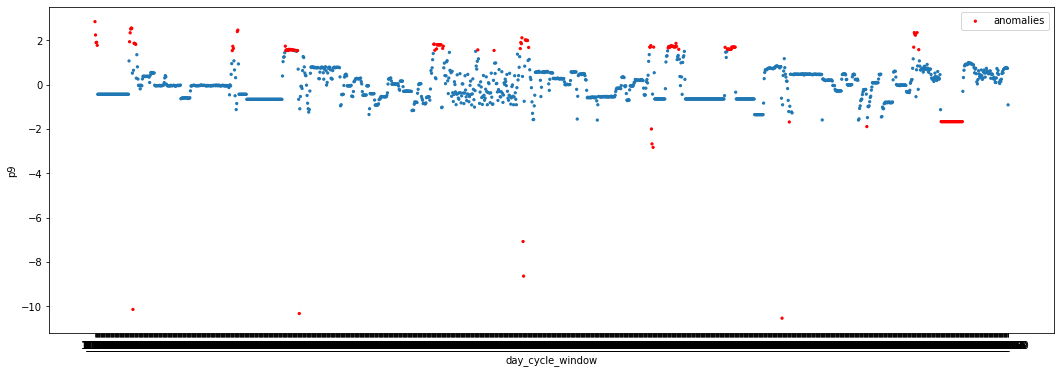

In [27]:
def anomalies_mean(serie, k=2):
    mean = serie.mean()
    sig = serie.std()
    
    anomalies = serie[(serie - mean).abs() > k*sig].copy()
    return anomalies

def anomalies_mad(serie, k=3):
    med = serie.median()
    mad = (serie - med).abs().median()
    anomalies = serie[(serie - med).abs() > k*mad].copy()
    return anomalies

def color_serie(serie, anomalies):
    return ['red' if v in anomalies.values else mplt_colors[0] for v in serie.values]

def scatter_serie_anomalies(serie, get_anomalies=anomalies_mad):
    anomalies = get_anomalies(serie)
    colors = color_serie(serie, anomalies)
    sdf = serie.to_frame().reset_index()
    ax = sdf.plot(x=serie.index.name, y=serie.name , figsize=(18, 6), kind='scatter', c=colors, marker='.')
    ax.legend(['anomalies'])
    
scatter_serie_anomalies(mdf.set_index(day_cycle_window).p9)

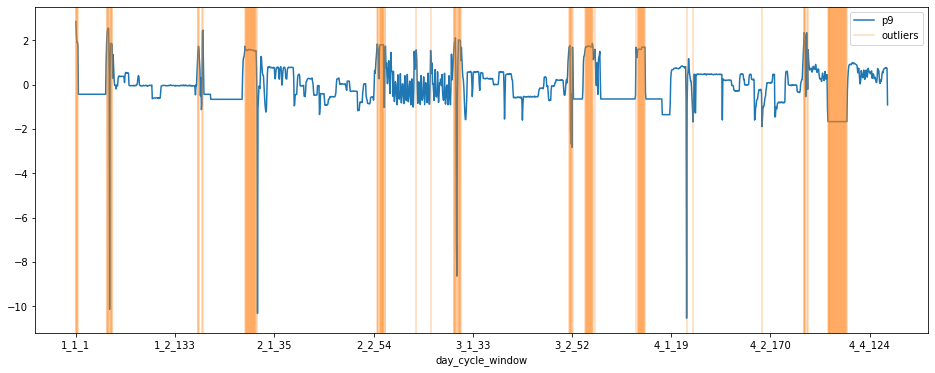

In [154]:
def plot_serie_anomalies(serie, get_anomalies=anomalies_mad, ax=None, figsize=(16, 6)):
    anomalies = get_anomalies(serie).reset_index()
    ax = serie.plot(label=serie.name, ax=ax, figsize=figsize)
    for i, outlier in enumerate(serie.reset_index().loc[serie.index.isin(anomalies.day_cycle_window.values)].index):
        ax.axvline(outlier, color=mplt_colors[1] ,alpha=0.3, label="_"*i + "outliers")
    ax.legend()

plot_serie_anomalies(mdf.set_index(day_cycle_window).p9)

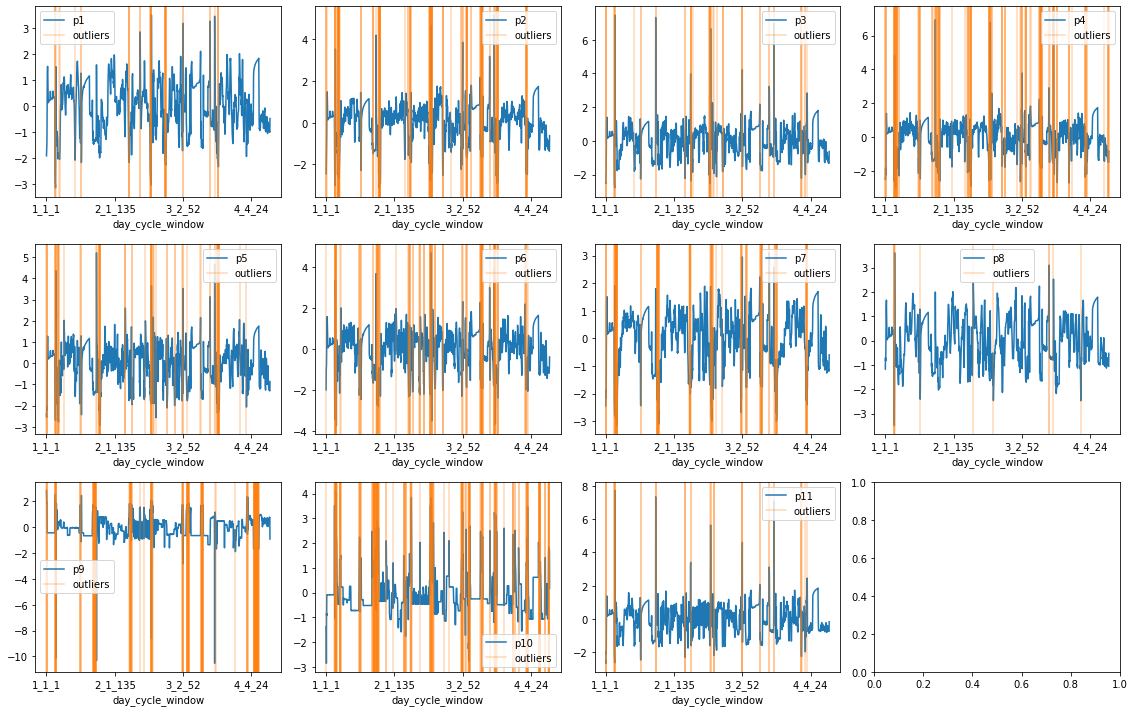

In [29]:
fig, axs = plt.subplots(3,4,figsize=(16,10))
for i, p in enumerate(feature_labels):
    ax = plt.subplot(3,4,i+1)
    plot_serie_anomalies(mdf.set_index(day_cycle_window)[p], ax=ax, figsize=None)

fig.tight_layout()

# Use of ML algorithms for outlier detection

In [30]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from collections import defaultdict

`outliers_fraction` below is one of the most important parameters that need to be defined with the aircraft expert

In [31]:
%%time
# Settings
outliers_fraction = 0.05

# define outlier/anomaly detection methods to be compared
anomaly_algorithms = [
    ("EllipticEnvelope", EllipticEnvelope(contamination=outliers_fraction)),
    ("OneClassSVM", OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1)),
    ("IsolationForest", IsolationForest(contamination=outliers_fraction, random_state=21)),
    ("LocalOutlierFactor", LocalOutlierFactor(contamination=outliers_fraction))]

algo_results = defaultdict(list)
for name, algorithm in anomaly_algorithms:
    X = mdf[feature_labels]
    algorithm.fit(X)
    # fit the data, tag outliers, get scores
    if name == "LocalOutlierFactor":
        y_pred = algorithm.fit_predict(X)
        scores = algorithm.negative_outlier_factor_
    else:
        y_pred = algorithm.fit(X).predict(X)
        scores = algorithm.score_samples(X)
    
    algo_results[name+"_outlier"] = [1 if y == -1 else 0 for y in y_pred]
    algo_results[name+"_score"] = (scores - np.min(scores))/np.ptp(scores)

mdf_outliers = pd.concat([mdf, pd.DataFrame(algo_results)], axis=1)
mdf_outliers

CPU times: user 6.49 s, sys: 59.6 ms, total: 6.55 s
Wall time: 1.98 s


day_cycle_window  day  cycle  window        p1        p2        p3  \
0               1_1_1    1      1       1 -1.926141 -2.456284 -2.487394   
1               1_1_2    1      1       2 -1.714067 -2.217161 -2.530537   
2               1_1_3    1      1       3 -1.534357 -1.779994 -1.938747   
3               1_1_4    1      1       4 -1.415197 -1.453962 -1.888438   
4               1_1_5    1      1       5 -0.732715 -0.634379 -0.963247   
...               ...  ...    ...     ...       ...       ...       ...   
1632          4_4_156    4      4     156 -0.956537 -1.347865 -1.277796   
1633          4_4_157    4      4     157 -0.984032 -1.350121 -1.296572   
1634          4_4_158    4      4     158 -1.006301 -1.363260 -1.319295   
1635          4_4_159    4      4     159 -1.013992 -1.368401 -1.323755   
1636          4_4_160    4      4     160 -0.485387 -0.623397 -0.630989   

            p4        p5        p6  ...       p10       p11  \
0    -2.481230 -2.388674 -1.984092  ... -1.370045 -2.500060   
1    -2.515985 -2.544961 -1.040076  ... -1.545889 -2.654753   
2    -1.835152 -2.053982 -0.866705  ... -2.853705 -1.926807   
3    -2.249327 -2.206560 -0.732366  ... -0.828060 -2.117340   
4    -1.871178 -2.048933 -0.004074  ... -0.932193 -1.796746   
...        ...       ...       ...  ...       ...       ...   
1632 -1.489708 -1.259816 -1.174963  ...  1.698238 -0.708232   
1633 -1.473924 -1.277888 -1.056938  ...  1.822312 -0.720395   
1634 -1.484471 -1.289714 -0.896817  ...  1.777215 -0.722794   
1635 -1.506278 -1.304717 -0.843966  ...  1.701126 -0.734295   
1636 -0.841035 -0.861749 -0.383586  ...  0.167093 -0.157237   

      EllipticEnvelope_outlier  EllipticEnvelope_score  OneClassSVM_outlier  \
0                            0                0.941586                    1   
1                            0                0.934046                    1   
2                            0                0.928808                    1   
3                            0                0.942450                    0   
4                            0                0.897387                    0   
...                        ...                     ...                  ...   
1632                         0                0.979430                    0   
1633                         0                0.977715                    0   
1634                         0                0.976504                    0   
1635                         0                0.976668                    0   
1636                         0                0.977372                    0   

      OneClassSVM_score  IsolationForest_outlier  IsolationForest_score  \
0              0.401402                        1               0.325648   
1              0.421027                        1               0.355127   
2              0.423571                        1               0.513728   
3              0.575113                        1               0.486187   
4              0.573543                        0               0.574369   
...                 ...                      ...                    ...   
1632           0.840209                        0               0.790048   
1633           0.827917                        0               0.793388   
1634           0.825448                        0               0.783959   
1635           0.829386                        0               0.783977   
1636           0.824198                        0               0.835412   

      LocalOutlierFactor_outlier  LocalOutlierFactor_score  
0                              0                  0.929876  
1                              0                  0.962235  
2                              0                  0.976411  
3                              0                  0.948334  
4                              0                  0.956829  
...                          ...                       ...  
1632                           0                  0.995363  
1633     

In [32]:
dcw_algos = [day_cycle_window]+list(algo_results.keys())
dcw_algos

['day_cycle_window',
 'EllipticEnvelope_outlier',
 'EllipticEnvelope_score',
 'OneClassSVM_outlier',
 'OneClassSVM_score',
 'IsolationForest_outlier',
 'IsolationForest_score',
 'LocalOutlierFactor_outlier',
 'LocalOutlierFactor_score']

In [33]:
df_outliers = pd.concat(
        [
            df.set_index(day_cycle_window),
            mdf_outliers[dcw_algos].set_index(day_cycle_window).reindex(df.set_index(day_cycle_window).index)
        ],
        axis=1,
        sort=False
    ).reset_index()
df_outliers

day_cycle_window  day  cycle  window        p1        p2        p3  \
0                 1_1_1    1      1       1 -0.805191 -1.141993 -1.328327   
1                 1_1_1    1      1       1 -0.805191 -1.134902 -1.320393   
2                 1_1_1    1      1       1 -0.805191 -1.117304 -1.307167   
3                 1_1_1    1      1       1 -0.814231 -1.114206 -1.287593   
4                 1_1_1    1      1       1 -0.848104 -1.112276 -1.285393   
...                 ...  ...    ...     ...       ...       ...       ...   
162697          4_4_160    4      4     160  0.147741  0.060913  0.185874   
162698          4_4_160    4      4     160  0.147741  0.060913  0.185874   
162699          4_4_160    4      4     160  0.147741  0.060913  0.185874   
162700          4_4_160    4      4     160  0.147741  0.060913  0.185874   
162701          4_4_160    4      4     160  0.196873  0.090617  0.292064   

              p4        p5        p6  ...       p10       p11  \
0      -1.516693 -1.373962 -0.808270  ...  0.495528 -1.246737   
1      -1.505848 -1.361560 -0.807840  ...  0.494467 -1.244472   
2      -1.505848 -1.361560 -0.807840  ...  0.429370 -1.244472   
3      -1.442302 -1.287565 -0.807840  ...  0.348056 -1.244472   
4      -1.429076 -1.270722 -0.807840  ...  0.118828 -1.270237   
...          ...       ...       ...  ...       ...       ...   
162697 -0.163053 -0.284814  0.150407  ...  0.614371  0.432218   
162698 -0.163053 -0.284814  0.177867  ...  0.614371  0.432218   
162699 -0.163053 -0.284814  0.179901  ...  0.614371  0.432218   
162700 -0.163053 -0.232045  0.179901  ...  0.614371  0.432218   
162701 -0.132991 -0.219665  0.198205  ...  0.614371  0.462288   

        EllipticEnvelope_outlier  EllipticEnvelope_score  OneClassSVM_outlier  \
0                              0                0.941586                    1   
1                              0                0.941586                    1   
2                              0                0.941586                    1   
3                              0                0.941586                    1   
4                              0                0.941586                    1   
...                          ...                     ...                  ...   
162697                         0                0.977372                    0   
162698                         0                0.977372                    0   
162699                         0                0.977372                    0   
162700                         0                0.977372                    0   
162701                         0                0.977372                    0   

        OneClassSVM_score  IsolationForest_outlier  IsolationForest_score  \
0                0.401402                        1               0.325648   
1                0.401402                        1               0.325648   
2                0.401402                        1               0.325648   
3                0.401402                        1               0.325648   
4                0.401402                        1               0.325648   
...                   ...                      ...                    ...   
162697           0.824198                        0               0.835412   
162698           0.824198                        0               0.835412   
162699           0.824198                        0               0.835412   
162700           0.824198                        0               0.835412   
162701           0.824198                        0               0.835412   

        LocalOutlierFactor_outlier  LocalOutlierFactor_score  
0                                0                  0.929876  
1                                0                  0.929876  
2                                0                  0.929876  
3                                0                  0.929876  
4                                0                  0.929876  
...                      

In [34]:
def get_outliers_labels(algo_name, mdf_outliers=mdf_outliers):
    return mdf_outliers.loc[mdf_outliers[algo_name+'_outlier']==1].day_cycle_window.values

get_outliers_labels('IsolationForest')

array(['1_1_1', '1_1_2', '1_1_3', '1_1_4', '1_1_64', '1_1_65', '1_1_66',
       '1_1_67', '1_2_1', '1_2_2', '1_2_3', '1_2_4', '1_2_5', '1_2_6',
       '1_2_8', '1_2_9', '1_2_17', '1_2_143', '1_4_1', '1_4_2', '2_1_1',
       '2_1_2', '2_1_20', '2_1_23', '2_1_24', '2_1_25', '2_1_28',
       '2_2_75', '2_2_76', '2_3_1', '2_3_2', '2_3_64', '2_3_65',
       '2_3_138', '2_3_139', '2_3_140', '2_3_141', '2_3_142', '2_3_143',
       '2_3_144', '2_3_145', '3_1_1', '3_1_2', '3_1_3', '3_1_4', '3_1_5',
       '3_1_6', '3_1_7', '3_1_8', '3_1_10', '3_1_12', '3_1_15', '3_1_20',
       '3_2_49', '3_2_50', '3_2_51', '3_2_52', '3_3_62', '3_3_63',
       '3_3_127', '3_3_128', '4_1_16', '4_1_17', '4_2_1', '4_2_2',
       '4_2_20', '4_2_21', '4_2_22', '4_2_23', '4_2_28', '4_2_29',
       '4_3_22', '4_3_62', '4_3_64', '4_3_65', '4_4_72', '4_4_73',
       '4_4_74', '4_4_75', '4_4_76', '4_4_77', '4_4_78'], dtype=object)

In [107]:
def get_sorted_outliers(algo_name, mdf_outliers=mdf_outliers):
    outlier_colname = algo_name+"_outlier"
    score_colname = algo_name+"_score"
    return mdf_outliers\
        .loc[mdf_outliers[outlier_colname]==1][[day_cycle_window, score_colname]]\
        .sort_values(score_colname)

get_sorted_outliers('IsolationForest')

day_cycle_window  IsolationForest_score
1231            4_2_1               0.000000
68              1_2_1               0.050751
768             3_1_1               0.056940
1000           3_2_52               0.081417
366             2_1_1               0.096861
...               ...                    ...
687            2_3_65               0.551059
393            2_1_28               0.553504
779            3_1_12               0.554862
1253           4_2_23               0.556207
1548           4_4_72               0.557458

[82 rows x 2 columns]

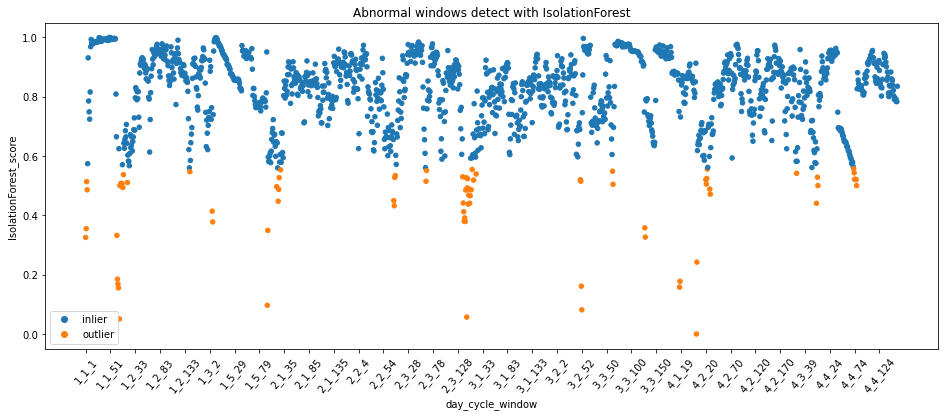

In [153]:
def scatter_score(algo_name, mdf_outliers=mdf_outliers, ax=None, figsize=(16,6)):
    ax = mdf_outliers.plot.scatter(
        ax=ax,
        x=day_cycle_window, 
        y=algo_name+"_score",
        color=mplt_colors[:2][mdf_outliers[algo_name+"_outlier"]],
        figsize=figsize,
        rot=50,
        xticks=np.arange(0,mdf_outliers.shape[0],50),
    )
    handlelist = [plt.plot([], marker="o", ls="", color=color)[0] for color in mplt_colors[:2]]
    ax.legend(handlelist,['inlier', 'outlier'])
    ax.set_title(f"Abnormal windows detect with {algo_name}")

scatter_score('IsolationForest')

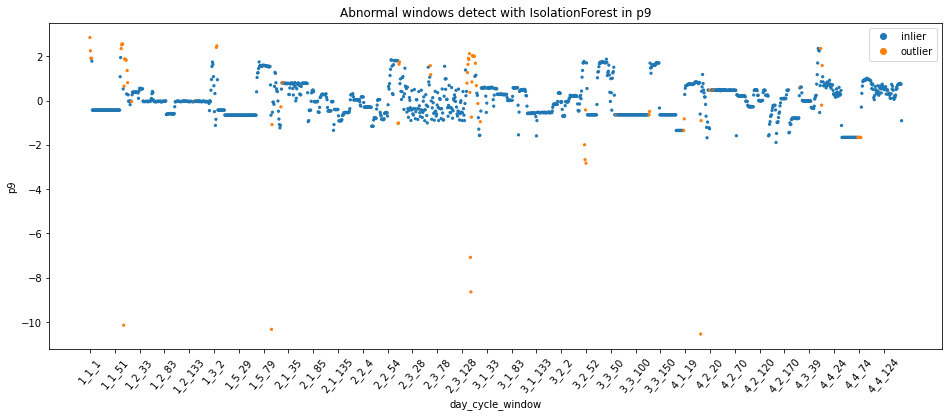

In [36]:
def scatter_serie_algo_anomalies(serie_name, algo_name, mdf_outliers=mdf_outliers, ax=None, figsize=(16,6)):
    ax = mdf_outliers.plot.scatter(
        ax=ax,
        x=day_cycle_window, 
        y=serie_name,
        marker='.',
        color=mplt_colors[:2][mdf_outliers[algo_name+"_outlier"]],
        figsize=figsize,
        rot=50,
        xticks=np.arange(0,mdf_outliers.shape[0],50),
    )
    handlelist = [plt.plot([], marker="o", ls="", color=color)[0] for color in mplt_colors[:2]]
    ax.legend(handlelist,['inlier', 'outlier'])
    ax.set_title(f"Abnormal windows detect with {algo_name} in {serie_name}")

scatter_serie_algo_anomalies('p9', 'IsolationForest')

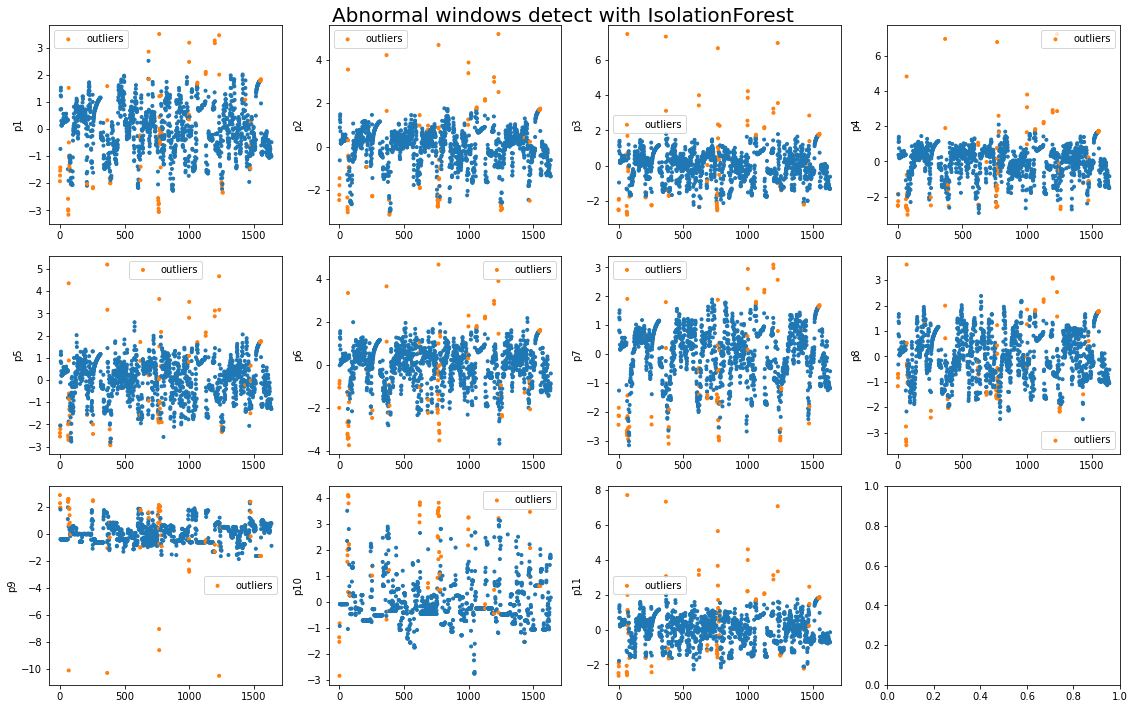

In [37]:
def scatter_all_series_algo_anomalies(algo_name, mdf_outliers=mdf_outliers, figsize=(16,10)):
    color=mplt_colors[:2][mdf_outliers[algo_name+"_outlier"]]
    fig, axs = plt.subplots(3,4,figsize=figsize)
    for i, p in enumerate(feature_labels):
        ax = plt.subplot(3,4,i+1)
        ax.scatter(mdf_outliers.index, mdf[p], c=color, marker='.')
        ax.set_ylabel(p)
        ax.legend(['outliers'])
    
    fig.suptitle(f"Abnormal windows detect with {algo_name}", fontsize=20)
    fig.tight_layout(rect=[0, 0, 1, 0.97])
    
scatter_all_series_algo_anomalies('IsolationForest')

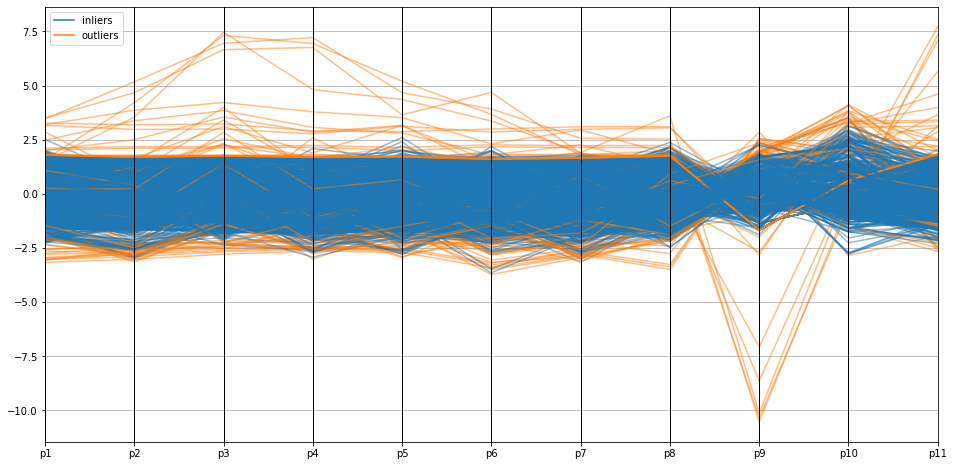

In [152]:
from pandas.plotting import parallel_coordinates
def plot_parallel_coordinates(algo_name, mdf_outliers=mdf_outliers, figsize=(16,8)):
    plt.figure(figsize=figsize)
    outlier_colname = algo_name+"_outlier"
    colors = mplt_colors[:2]
    ax = parallel_coordinates(
        mdf_outliers[np.append(outlier_colname, feature_labels)], 
        outlier_colname, 
        sort_labels=True,
        color=colors,
        alpha=0.5,
    )
    handlelist = [plt.plot([], color=color)[0] for color in colors]
    ax.legend(handlelist,['inliers', 'outliers'])
                                                                                                                          
plot_parallel_coordinates('IsolationForest')
                                                                                                                      

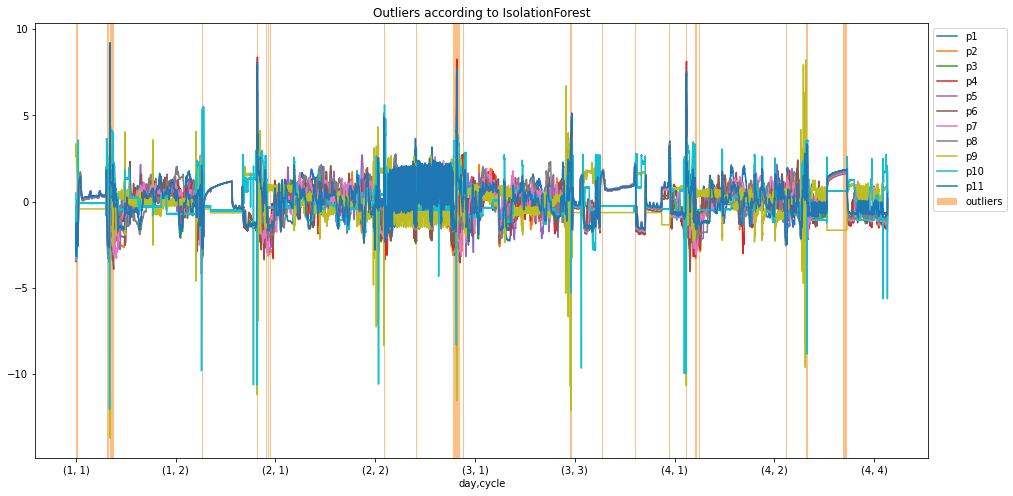

In [215]:
def get_outliers_intervals(outlier_colname, df_=df_outliers):
    v = df_[outlier_colname].values
    diff_idxs = [0] + list(np.where(v[:-1] != v[1:])[0]) + [v.shape[0]]
    first_is_inlier = v[0] == 0
    outliers_intervals = [(diff_idxs[i+ 1*first_is_inlier], diff_idxs[i + 1 + 1*first_is_inlier]) 
                          for i in range(0, len(diff_idxs)-1-1*first_is_inlier, 2)]
    return outliers_intervals

def plot_df_outliers(algo_name='IsolationForest', df_outliers=df_outliers, ax=None):
    outlier_colname = algo_name+"_outlier"
    if ax is None:
        fig, ax = plt.subplots(figsize=(16,8))
    df_outliers.set_index(['day', 'cycle'])[feature_labels].plot(ax=ax)
    # plot outlier vspan
    outliers_intervals = get_outliers_intervals(outlier_colname, df_outliers)
    for i, outliers_interval in enumerate(outliers_intervals):
        ax.axvspan(*outliers_interval, facecolor=mplt_colors[1] ,alpha=0.5, label="_"*i + "outliers")
  
    ax.set_title(f"Outliers according to {algo_name}")
    ax.legend(bbox_to_anchor=(1, 1))

plot_df_outliers('IsolationForest')

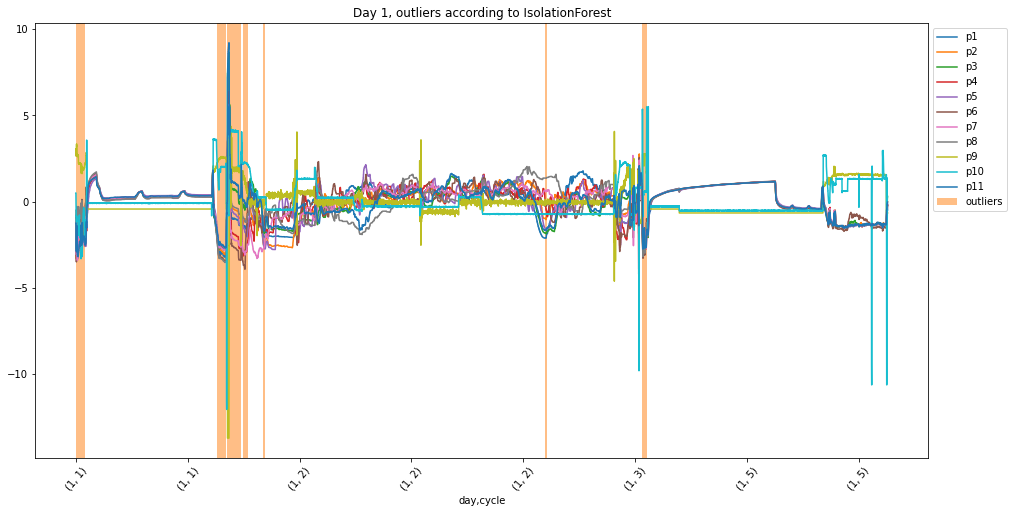

In [211]:
def plot_day_outliers(day, algo_name='IsolationForest', df_outliers=df_outliers):
    outlier_colname = algo_name+"_outlier"
    fig, ax = plt.subplots(figsize=(16,8))
    day_df = df_outliers.loc[df_outliers['day'] == day]
    day_df.set_index(['day', 'cycle'])[feature_labels].plot(
        ax=ax,
        rot=50,
    )
    # plot outlier vspan
    outliers_intervals = get_outliers_intervals(outlier_colname, day_df)
    for i, outliers_interval in enumerate(outliers_intervals):
        ax.axvspan(*outliers_interval, facecolor=mplt_colors[1] ,alpha=0.5, label="_"*i + "outliers")
  
    ax.set_title(f"Day {day}, outliers according to {algo_name}")
    ax.legend(bbox_to_anchor=(1, 1))

plot_day_outliers(1)

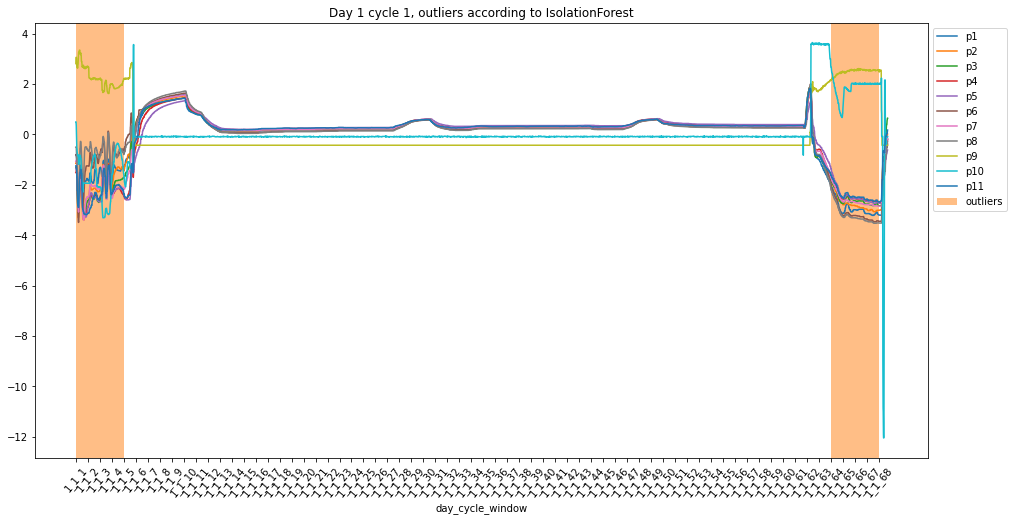

In [212]:
def plot_cycle_outliers(day, cycle, algo_name='IsolationForest', df_outliers=df_outliers):
    outlier_colname = algo_name+"_outlier"
    fig, ax = plt.subplots(figsize=(16,8))
    dc_df = df_outliers.loc[df_outliers['day'] == day].loc[df_outliers['cycle'] == cycle]
    dc_df.set_index(day_cycle_window)[feature_labels].plot(
        ax=ax,
        xticks=range(0,dc_df.shape[0], 100),
        rot=50,
    )
    # plot outlier vspan
    outliers_intervals = get_outliers_intervals(outlier_colname, dc_df)
    for i, outliers_interval in enumerate(outliers_intervals):
        ax.axvspan(*outliers_interval, facecolor=mplt_colors[1] ,alpha=0.5, label="_"*i + "outliers")
  
    ax.set_title(f"Day {day} cycle {cycle}, outliers according to {algo_name}")
    ax.legend(bbox_to_anchor=(1, 1))

plot_cycle_outliers(1,1)

# PCA
Making a PCA allows us to visualize the 11 features in reduced space like 2D plan.

In [42]:
from sklearn.decomposition import PCA

In [52]:
# Making the PCA on the 
pca = PCA(n_components=len(feature_labels))
pca.fit(mdf[feature_labels])
XPCA = pca.fit_transform(mdf[feature_labels])
print(f"{XPCA.shape=}")
print(f"Explained variance for each PCA dim: {pca.explained_variance_ratio_}")

XPCA.shape=(1637, 11)
Explained variance for each PCA dim: [0.62906609 0.12725862 0.04539754 0.04342628 0.03657464 0.03225765
 0.02769817 0.0209818  0.01837911 0.01423389 0.00472622]


In [126]:
get_sorted_outliers('IsolationForest')[:5]

day_cycle_window  IsolationForest_score
1231            4_2_1               0.000000
68              1_2_1               0.050751
768             3_1_1               0.056940
1000           3_2_52               0.081417
366             2_1_1               0.096861

In [128]:
for a,(b,c) in get_sorted_outliers('IsolationForest')[:5].iterrows():
    print(f"{a=}, {b=}, {c=}")

a=1231, b='4_2_1', c=0.0
a=68, b='1_2_1', c=0.0507512734196073
a=768, b='3_1_1', c=0.056940329037585106
a=1000, b='3_2_52', c=0.0814174578875662
a=366, b='2_1_1', c=0.09686137481706636


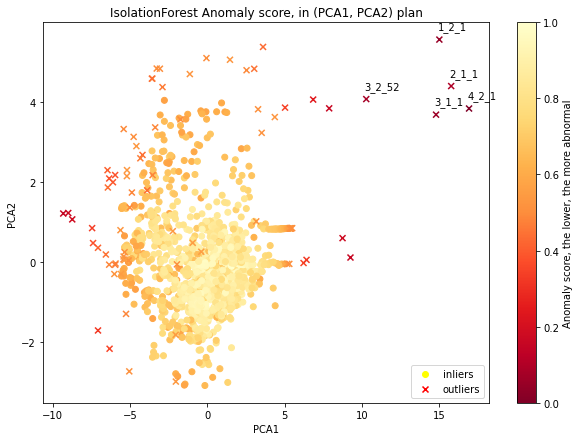

In [144]:
def plot_PCA(algo_name='IsolationForest', mdf_outliers=mdf_outliers, one_plot=True):
    outlier_colname = algo_name+"_outlier"
    score_colname = algo_name+"_score"
    # variables for plot
    liers = ['inliers', 'outliers']
    markers = ['o', 'x']
    vmin, vmax = mdf_outliers[score_colname].min(), mdf_outliers[score_colname].max()
    # Plot
    if one_plot: plt.figure(figsize=(10,7))
    plt.title(f"{algo_name} Anomaly score, in (PCA1, PCA2) plan")
    for outlier, grouped in mdf_outliers.groupby(outlier_colname):
        indexes = mdf_outliers.index[mdf_outliers[outlier_colname] == outlier].tolist()
        scores = mdf_outliers[mdf_outliers[outlier_colname] == outlier][score_colname].values
        plt.scatter(XPCA[indexes,0], XPCA[indexes,1], c=scores, cmap='YlOrRd_r', 
                    marker=markers[outlier], label=liers[outlier], vmin=vmin, vmax=vmax)
    plt.colorbar(label='Anomaly score, the lower, the more abnormal')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    # Annotate
    ax = plt.gca()
    for i, (window_label, score) in get_sorted_outliers(algo_name)[:5].iterrows():
        ax.annotate(window_label, (XPCA[i,0], XPCA[i,1]), xytext=(XPCA[i,0]-0.1, XPCA[i,1]+0.25))
    # Legend
    plt.legend(loc='lower right')
    leg = ax.get_legend()
    leg.legendHandles[0].set_color('yellow')
    leg.legendHandles[1].set_color('red')


plot_PCA()

# Results
We have seen that the data are __evenly distributed between the features__ and __well divided between the windows__, except for the windows ending a cycle that contain less than 100 points, and the cycle `1_3` and `1_4` that contain __less than 20 windows__ while all the other ones contain __more than 50__.

Below there is some of the result that we can extract from the different Outlier Detection algorithm. 

## 1. The 5 more abnormal window according to their anomaly scores
For each anomaly algorithms

In [146]:
sorted_outlier_dfs = []
for name, algo in anomaly_algorithms:
    sorted_outlier_df = get_sorted_outliers(name)
#     print(f"Outliers according to {name}: {sorted_outlier_df}")
    display(sorted_outlier_df.head(5))
    sorted_outlier_dfs.append(sorted_outlier_df)



day_cycle_window  EllipticEnvelope_score
366             2_1_1                0.000000
1231            4_2_1                0.153155
68              1_2_1                0.215077
768             3_1_1                0.227840
767           2_3_145                0.433822

day_cycle_window  OneClassSVM_score
767           2_3_145           0.000000
768             3_1_1           0.054693
68              1_2_1           0.058252
1000           3_2_52           0.091383
1231            4_2_1           0.105436

day_cycle_window  IsolationForest_score
1231            4_2_1               0.000000
68              1_2_1               0.050751
768             3_1_1               0.056940
1000           3_2_52               0.081417
366             2_1_1               0.096861

day_cycle_window  LocalOutlierFactor_score
68              1_2_1                  0.000000
1231            4_2_1                  0.007449
366             2_1_1                  0.118184
768             3_1_1                  0.143628
1000           3_2_52                  0.401784

## 2. (PCA1, PCA2) plan with anomaly scores display through a colormap

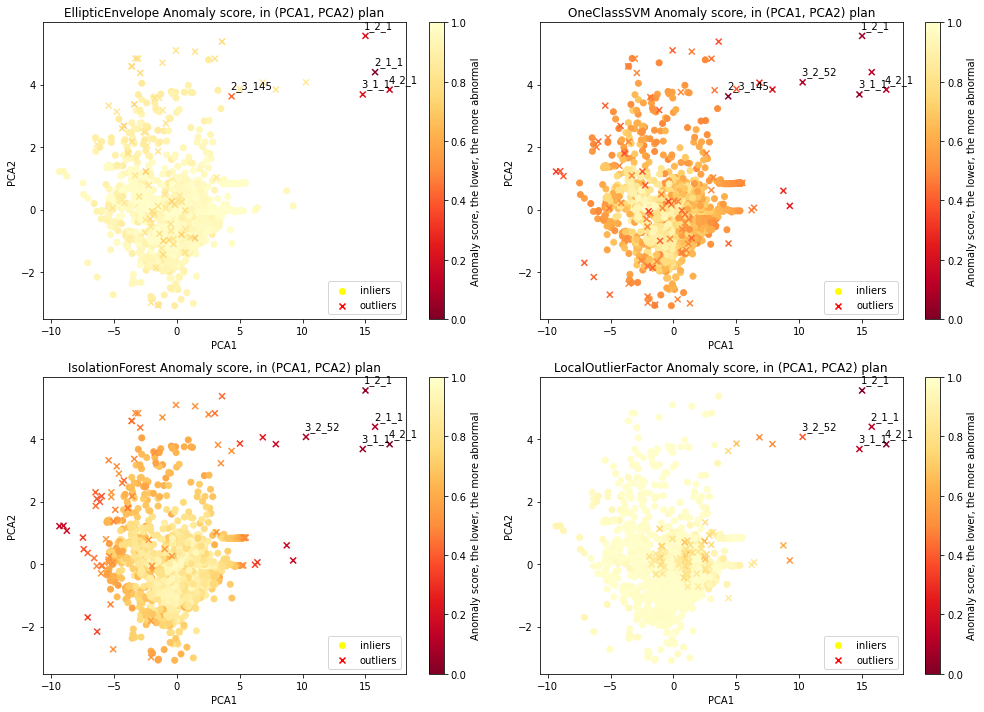

In [145]:
fig, axs = plt.subplots(2,2,figsize=(14,10))
for i, (algo_name, algo) in enumerate(anomaly_algorithms):
    plt.subplot(2,2,i+1)
    plot_PCA(algo_name, one_plot=False)
plt.tight_layout()

## 3. Plot of all the features with outliers highlighted in the vertical orange bands

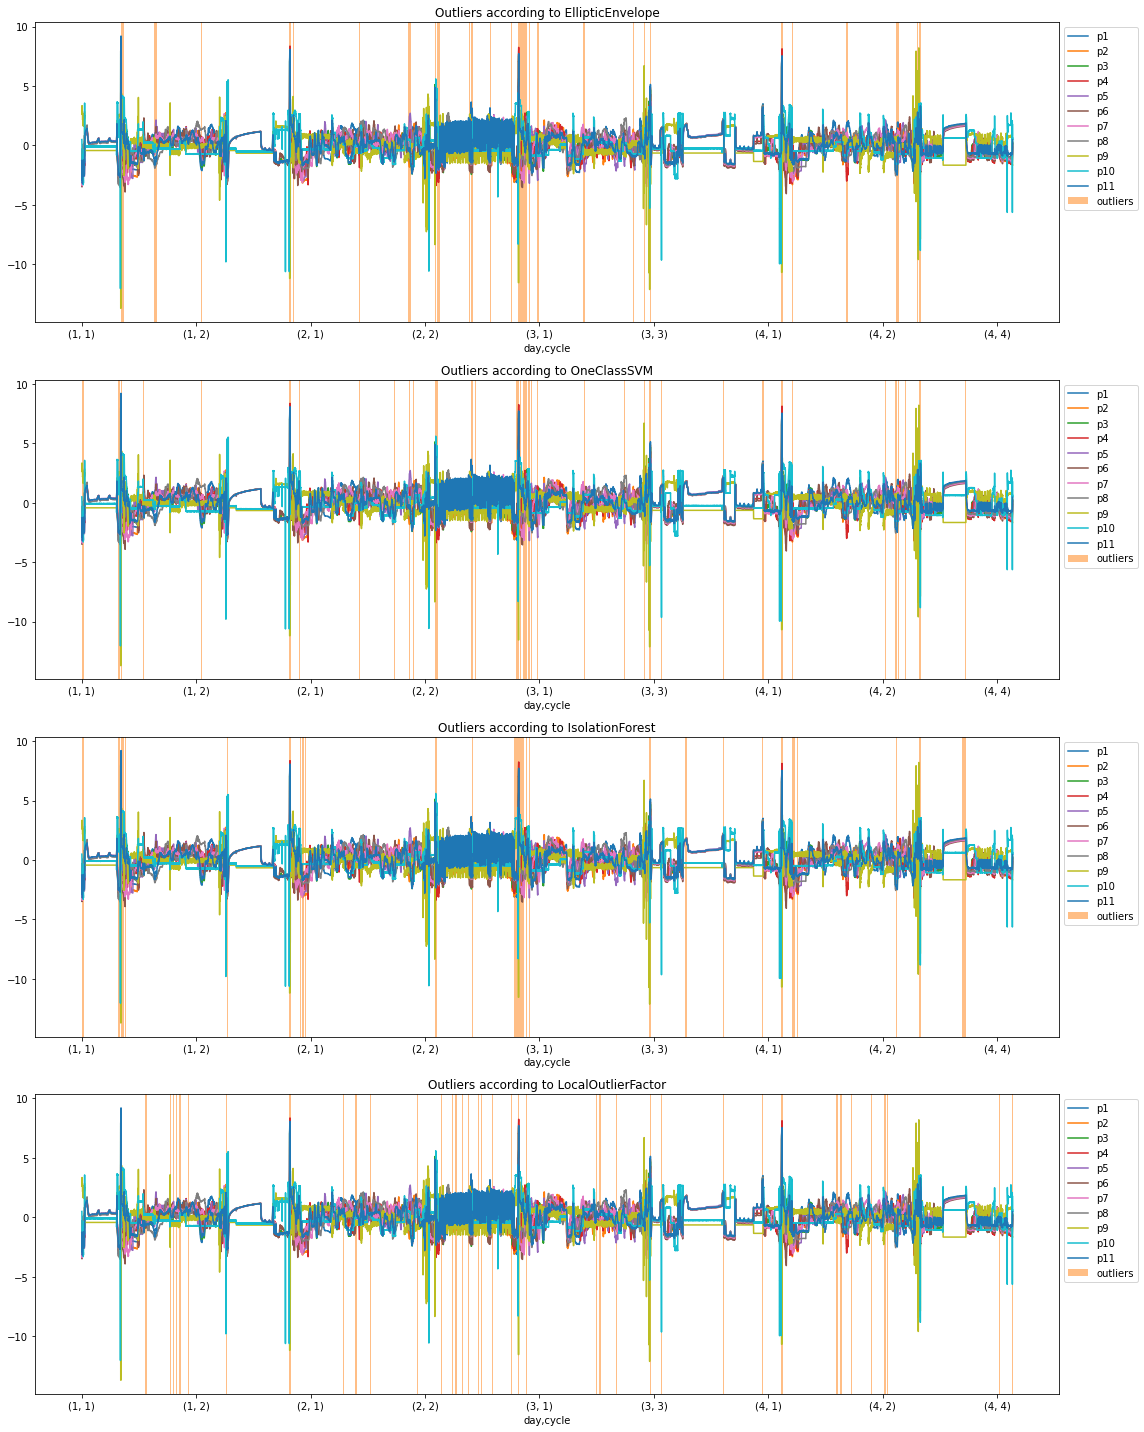

In [221]:
fig, axs = plt.subplots(4,1,figsize=(16,20))
for i, (name, _) in enumerate(anomaly_algorithms):
    plt.subplot(4,1,i+1)
    plot_df_outliers(name, ax=plt.gca())
plt.tight_layout()

# Going further
We have here study the dataset only as a whole considering the mean on each window. Other approach can be done for exemple considering each cycle or each day as an individual dataset and therefore saying that a window is abnormal inside her cycle.

Another way can be considering the data points individually inside each cycle and saying that a window is abnormal if it contains more than $N_{threshold}$ abnormal data points based on the cycle data.

A good approach would be to study the dataset with this different techniques and then compare the result to see which windows are classified as abnormal in the most cases.